In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
data =pd.read_csv("/content/drive/MyDrive/ES114 Assignment/Data.csv")
funds = pd.read_csv("/content/drive/MyDrive/ES114 Assignment/NCAP_Funding.csv")
state = pd.read_csv("/content/drive/MyDrive/ES114 Assignment/State_data.csv")

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
data.head(5)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
funds.head(5)

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [7]:
state.head(5)

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


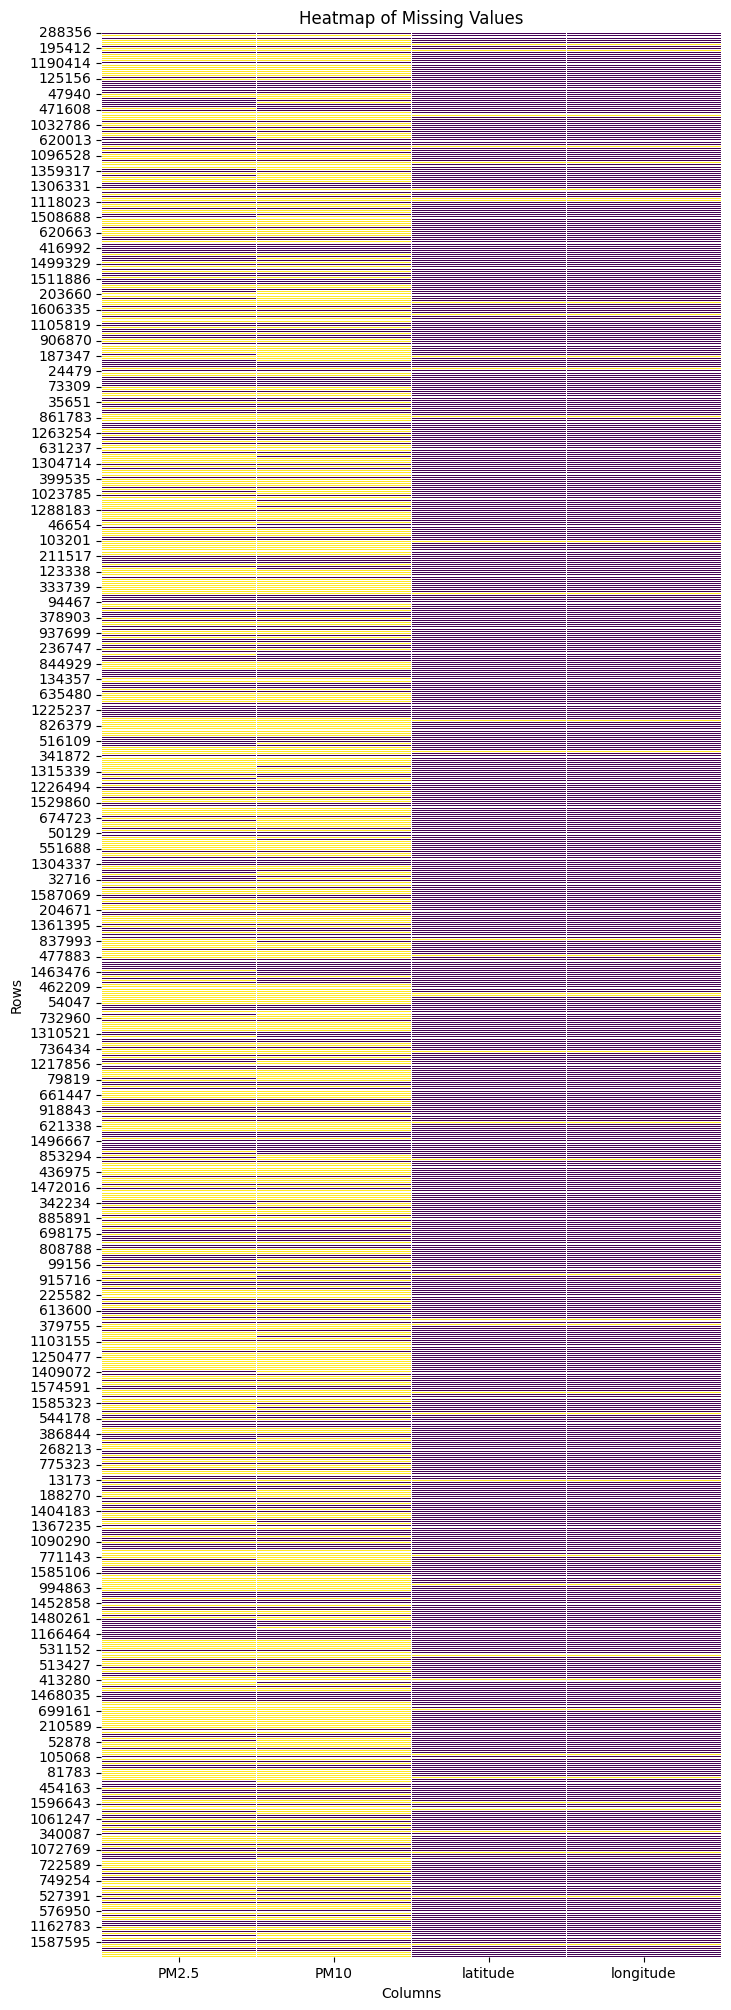

In [134]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sample_size = 1000
random_indices = np.random.choice(numeric_data.index, size=sample_size, replace=False)
downsampled_df = numeric_data.loc[random_indices]
missing_mask = downsampled_df.isnull()
plt.figure(figsize=(8, 25))
sns.heatmap(missing_mask, cbar=False, cmap="viridis", linewidths=0.5)
# Add titles and labels
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

SPATIAL AGGREGATION

In [9]:
#1
print("state that (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years : \n",data.groupby("state")["PM2.5"].mean().idxmax() , data.groupby("state")["PM2.5"].mean().max() , "PM2.5")

state that (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years : 
 Delhi 104.1009176780069 PM2.5


In [10]:
#2
print(" state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023\n" ,
      data.loc[(data["PM2.5"] > 300) & (data["Timestamp"].str[:4]=="2023")].groupby("state")["Timestamp"].nunique().idxmax(),
      data.loc[(data["PM2.5"] > 300) & (data["Timestamp"].str[:4]=="2023")].groupby("state")["Timestamp"].nunique().max(),
      "days")

 state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023
 Delhi 49 days


In [126]:
#3
print("state has the highest variability in PM2.5 levels across its monitoring stations in 2023\n",
      data.loc[data["Timestamp"].str[:4] == "2023"].groupby(["state","station"])["PM2.5"].std().groupby("state").mean().idxmax())


state has the highest variability in PM2.5 levels across its monitoring stations in 2023
 Delhi


In [12]:
#4
print("state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)",
      data.loc[data["Timestamp"].str[:4] == ("2020" or "2021")].groupby("state")["PM2.5"].mean().idxmin(),
      data.loc[data["Timestamp"].str[:4] == ("2020" or "2021")].groupby("state")["PM2.5"].mean().min())

state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive) Mizoram 13.420796476414198


Temporal Aggregation

In [127]:
#1
print("station that recorded the highest value of PM 2.5 for the month Aug of 2020\n",
    data.loc[data["Timestamp"].str[:7] == "2020-08"].groupby("station")["PM2.5"].max().idxmax(),
    data.loc[data["Timestamp"].str[:7] == "2020-08"].groupby("station")["PM2.5"].max().max())

station that recorded the highest value of PM 2.5 for the month Aug of 2020
 Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB 805.51


In [128]:
#2
station_data = data.loc[(data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB" ) & (data["Timestamp"].str[:4] == "2018")]
station_data.head(5)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
205010,2018-01-01,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka
205571,2018-01-02,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka
206132,2018-01-03,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka
206693,2018-01-04,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka
207254,2018-01-05,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka


In [135]:
l_dates = station_data["Timestamp"].unique()
mappings ={}
winter = [12,1,2]
summer = [3,4,5]
monsoon = [6,7,8,9]
for i in l_dates :
    if pd.isnull(i):
        continue
    else :
        if int(i[5:7]) in winter: mappings[i] = "winter"
        elif int(i[5:7]) in summer: mappings[i] = "summer"
        elif int(i[5:7]) in monsoon: mappings[i] = "monsoon"
        else : mappings[i] = "None"

station_data["season"] = station_data["Timestamp"].replace(mappings)


In [16]:
station_data.head(5)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,season
205010,2018-01-01,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,winter
205571,2018-01-02,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,winter
206132,2018-01-03,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,winter
206693,2018-01-04,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,winter
207254,2018-01-05,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,NaN,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,winter


In [136]:
print(station_data.groupby("season")["PM2.5"].mean())

season
None       56.825144
monsoon    34.425196
summer           NaN
winter     67.492344
Name: PM2.5, dtype: float64


Winter is the season with highest pollution

Thought Question: Why are certain seasons generally more polluted than others? Potential Factors:

Winter:

Temperature Inversion: Cold air traps pollutants close to the ground, leading to higher concentrations.

Increased Burning: Use of wood, coal, and other fuels for heating increases particulate matter.

Festivals: Fireworks during festivals like Diwali contribute to pollution spikes.

Summer:

Dust Storms: Dry weather and wind lead to increased dust and particulate matter.

High Temperatures: Accelerates chemical reactions, leading to the formation of secondary pollutants like ozone.

Monsoon:

Rainfall: Washes away pollutants, leading to cleaner air.

Reduced Dust: Wet conditions suppress dust and particulate matter.

Post-Monsoon:

Stubble Burning: Agricultural residue burning in states like Punjab and Haryana significantly increases pollution.

In [137]:
#3
station_data3 = data.loc[(data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB") & (data["Timestamp"].str[:4] == "2021")]
station_data3.head(5)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
819866,2021-01-01,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,168.421739,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka
820427,2021-01-02,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,251.211084,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka
820988,2021-01-03,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,126.495323,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka
821549,2021-01-04,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,90.807656,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka
822110,2021-01-05,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,63.450606,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka


In [141]:
station_data3["weekend"]  = pd.to_datetime(station_data3["Timestamp"]).dt.weekday >= 5
station_data3["month"] = pd.to_datetime(station_data3["Timestamp"]).dt.month_name()
station_data3.head(5)

<ipython-input-141-e7d621fdd24a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data3["weekend"]  = pd.to_datetime(station_data3["Timestamp"]).dt.weekday >= 5
<ipython-input-141-e7d621fdd24a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data3["month"] = pd.to_datetime(station_data3["Timestamp"]).dt.month_name()


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,weekend,month
819866,2021-01-01,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,168.421739,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,False,January
820427,2021-01-02,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,251.211084,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,True,January
820988,2021-01-03,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,126.495323,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,True,January
821549,2021-01-04,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,90.807656,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,False,January
822110,2021-01-05,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",NaN,63.450606,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka,False,January


<ipython-input-142-b369ce3c08fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data3["month"] = pd.Categorical(station_data3["month"], categories=month_order, ordered=True)
<ipython-input-142-b369ce3c08fc>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_data3.loc[station_data3["weekend"] == True].groupby(["month"])["PM2.5"].mean().plot(kind='line', marker='o', label = "weekends" , title='Line Plot of Data')
<ipython-input-142-b369ce3c08fc>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

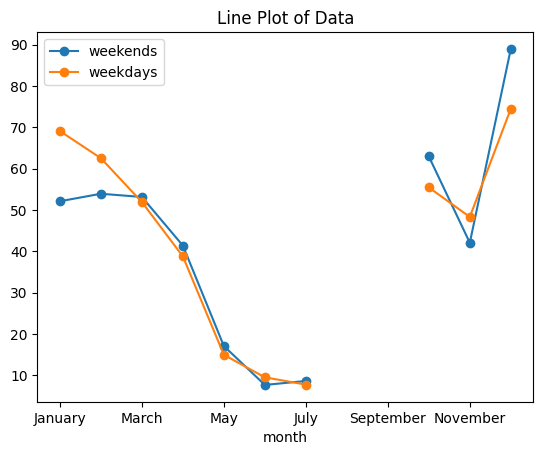

In [142]:

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
station_data3["month"] = pd.Categorical(station_data3["month"], categories=month_order, ordered=True)
station_data3.loc[station_data3["weekend"] == True].groupby(["month"])["PM2.5"].mean().plot(kind='line', marker='o', label = "weekends" , title='Line Plot of Data')
station_data3.loc[station_data3["weekend"] == False].groupby(["month"])["PM2.5"].mean().plot(kind='line', marker='o', label = "weekdays")
plt.legend()



Spatio - Temporal Aggregation

In [144]:
#1
filter_dat = data.loc[data["Timestamp"].str[:4] == "2022"]
l_dates = filter_dat["Timestamp"].unique()
mappings ={}
winter = [12,1,2]
summer = [3,4,5]
monsoon = [6,7,8,9]
for i in l_dates :
    if pd.isnull(i):
        continue
    else :
        if int(i[5:7]) in winter: mappings[i] = "winter"
        elif int(i[5:7]) in summer: mappings[i] = "summer"
        elif int(i[5:7]) in monsoon: mappings[i] = "monsoon"
        else : mappings[i] = "None"

filter_dat["season"] = filter_dat["Timestamp"].replace(mappings)


<ipython-input-144-94d4067cd054>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_dat["season"] = filter_dat["Timestamp"].replace(mappings)


In [145]:
filter_dat.head(5)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state,season
1024386,2022-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh,winter
1024387,2022-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh,winter
1024388,2022-01-01,"Adarsh Nagar, Jaipur - RSPCB",113.671449,159.332029,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan,winter
1024389,2022-01-01,"Airoli, Navi Mumbai - MPCB",NaN,NaN,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra,winter
1024390,2022-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,winter


In [151]:
summer_val = filter_dat[filter_dat["season"]=="summer"].groupby("state")["PM2.5"].mean()
monsoon_val = filter_dat[filter_dat["season"]=="monsoon"].groupby("state")["PM2.5"].mean()
pm25_change = abs((monsoon_val - summer_val)/summer_val)
print("For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?\n",
     pm25_change.idxmax(),pm25_change.max()*100,"%" )


For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?
 Assam 61.17641855538734 %


<ipython-input-152-c2331ffef791>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Timestamp"] = pd.to_datetime(data["Timestamp"])
<ipython-input-152-c2331ffef791>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data["Year"] = delhi_data["Timestamp"].dt.year
<ipython-input-152-c2331ffef791>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

<Figure size 1000x500 with 0 Axes>

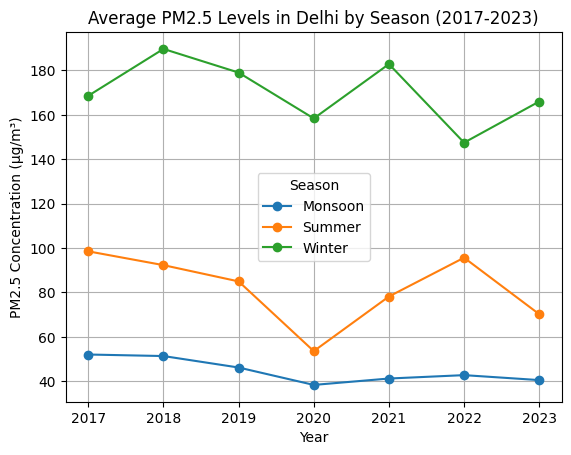

In [152]:
#2

delhi_data = data[data["state"]=="Delhi"]
delhi_data["Timestamp"] = pd.to_datetime(data["Timestamp"])
delhi_data["Year"] = delhi_data["Timestamp"].dt.year
delhi_data["Month"] = delhi_data["Timestamp"].dt.month
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Other"
delhi_data["Season"] = delhi_data["Month"].apply(assign_season)
delhi_data = delhi_data[delhi_data["Season"] != "Other"]
delhi_data = delhi_data[delhi_data["Year"]<2024]

seasonal_trends = delhi_data.groupby(["Year", "Season"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
seasonal_trends.plot(kind="line", marker="o")

plt.title("Average PM2.5 Levels in Delhi by Season (2017-2023)")
plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.legend(title="Season")
plt.grid(True)
plt.show()



<ipython-input-25-d39aeb92dedb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_dat["Timestamp"] = pd.to_datetime(data["Timestamp"])
<ipython-input-25-d39aeb92dedb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_dat["Year"] = filter_dat["Timestamp"].dt.year


<Figure size 1000x500 with 0 Axes>

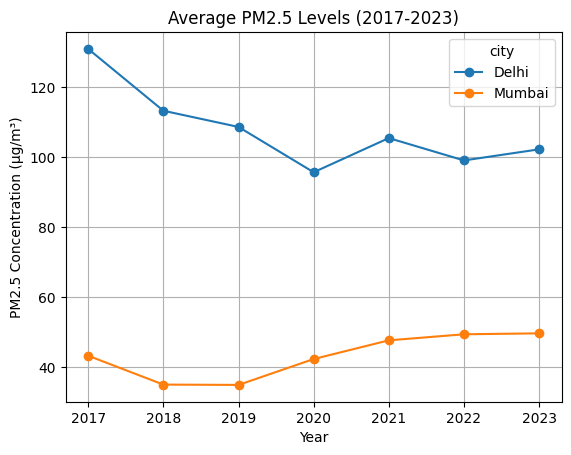

In [25]:
#3
filter_dat = data[data["city"].isin(["Delhi","Mumbai"])]
filter_dat["Timestamp"] = pd.to_datetime(data["Timestamp"])
filter_dat["Year"] = filter_dat["Timestamp"].dt.year
filter_dat = filter_dat[filter_dat["Year"]<2024]
plt.figure(figsize=(10, 5))


filter_dat.groupby(["Year","city"])["PM2.5"].mean().unstack().plot(kind="line", marker="o")
plt.title("Average PM2.5 Levels (2017-2023)")
plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.legend(title="city")
plt.grid(True)
plt.show()


Delhi has more fluctuation compared to Mumbai

<H1>Population Based</H1>

In [26]:
result = pd.merge(state, data, left_on='State', right_on='state', how='outer')
result = result.drop(columns="state")
result["Timestamp"] = pd.to_datetime(result["Timestamp"])
result.head(5)


,State,Population,Area (km2),Timestamp,station,PM2.5,PM10,address,city,latitude,longitude
0,Andhra Pradesh,49577103.0,162975.0,2017-01-01,"Anand Kala Kshetram, Rajamahendravaram - APPCB",NaN,NaN,"Sri Venkateswara Anam Kala Kendram, Lakshmivar...",Rajamahendravaram,16.987287,81.736318
1,Andhra Pradesh,49577103.0,162975.0,2017-01-01,"GVM Corporation, Visakhapatnam - APPCB",NaN,NaN,"GVMC Building, Jail Rd, Ram Nagar",Visakhapatnam,17.720000,83.300000
2,Andhra Pradesh,49577103.0,162975.0,2017-01-01,"Gangineni Cheruvu, Chittoor - APPCB",NaN,NaN,"Andhra Pradesh State Pollution Control Board, ...",Chittoor,13.204880,79.097889
3,Andhra Pradesh,49577103.0,162975.0,2017-01-01,"Gulzarpet, Anantapur - APPCB",NaN,NaN,"Public Health Office, Court Road, Anantapur.",Anantapur,14.675886,77.593027
4,Andhra Pradesh,49577103.0,162975.0,2017-01-01,"HB Colony, Vijayawada - APPCB",NaN,NaN,"Near Water Tank, Water Tank Road, HB Colony, B...",Vijayawada,16.536107,80.594233


In [27]:
#1
print("state in India has the highest number of monitoring stations relative to its population\n",
      (result.groupby('State')["station"].size()/result.groupby('State')["Population"].mean()).idxmax())


state in India has the highest number of monitoring stations relative to its population
 Chandigarh


<Axes: title={'center': 'State Pollution Levels'}, xlabel='State', ylabel='Pollution Level per Captia'>

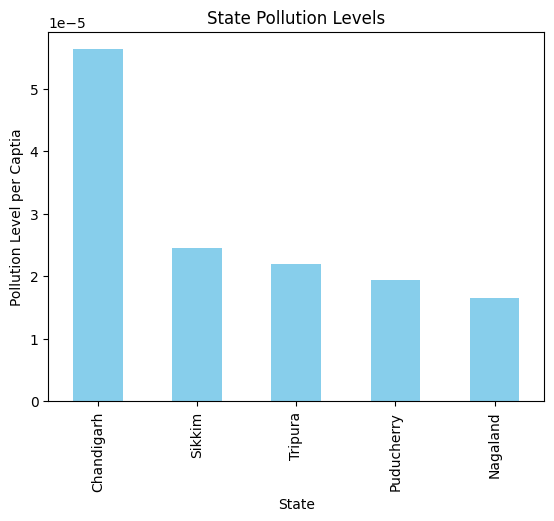

In [28]:
#2
filter_dat = result[result["Timestamp"].dt.year == 2023]
(filter_dat.groupby("State")["PM2.5"].mean()/filter_dat.groupby("State")["Population"].mean()).nlargest(5).plot(kind='bar', color='skyblue', title="State Pollution Levels", xlabel="State", ylabel="Pollution Level per Captia")



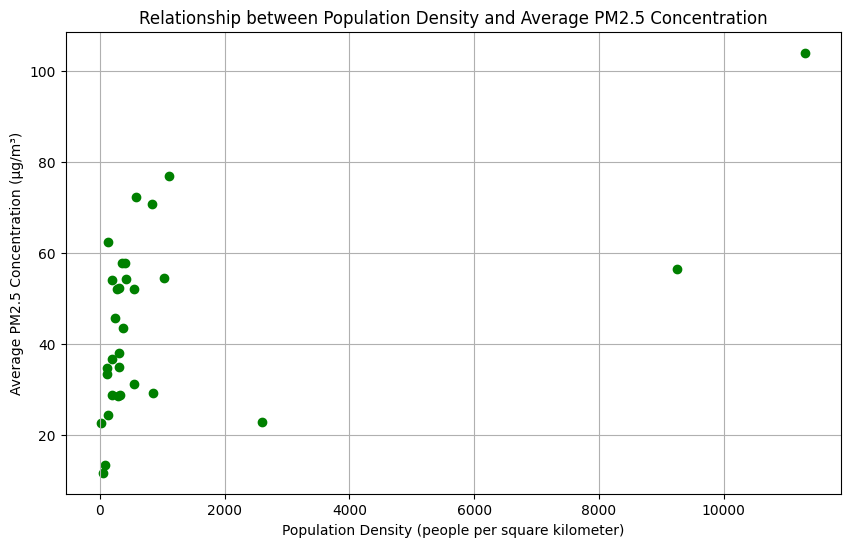

In [29]:
#3
pm25 = result.groupby("State")["PM2.5"].mean()
pop_den = result.groupby("State")["Population"].mean()/result.groupby("State")["Area (km2)"].mean()
combined_df = pd.DataFrame({
    'PM2.5': pm25,
    'Population Density': pop_den
})

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Population Density'], combined_df['PM2.5'], color='green', marker='o')

# Adding labels and title
plt.title("Relationship between Population Density and Average PM2.5 Concentration")
plt.xlabel("Population Density (people per square kilometer)")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.grid(True)

# Display the plot
plt.show()

<h1>Area Based</h1>

state that has the highest PM2.5 concentration per square kilometer
Chandigarh 



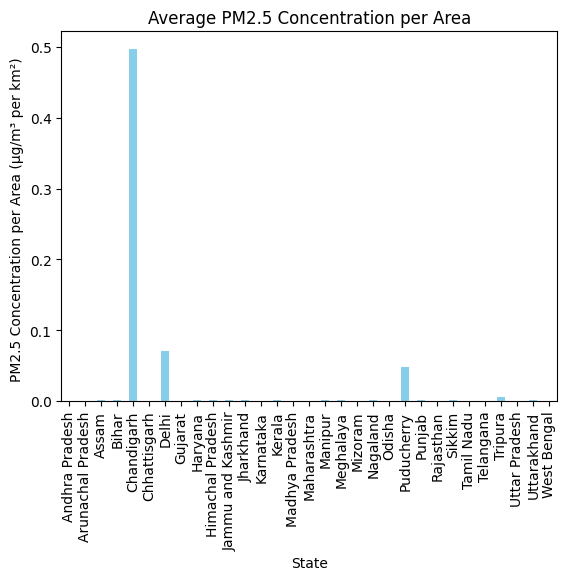

In [155]:
#1
resultc = result.dropna(subset=['PM2.5', 'State'])
(resultc.groupby("State")["PM2.5"].mean() / resultc.groupby("State")["Area (km2)"].mean()).plot(kind='bar', color='skyblue', title="Average PM2.5 Concentration per Area", xlabel="State", ylabel="PM2.5 Concentration per Area (µg/m³ per km²) ")
print("state that has the highest PM2.5 concentration per square kilometer")
print((resultc.groupby("State")["PM2.5"].mean()/resultc.groupby("State")["Area (km2)"].mean()).idxmax(),"\n")

state with the highest density of monitoring stations relative to its area
Delhi 



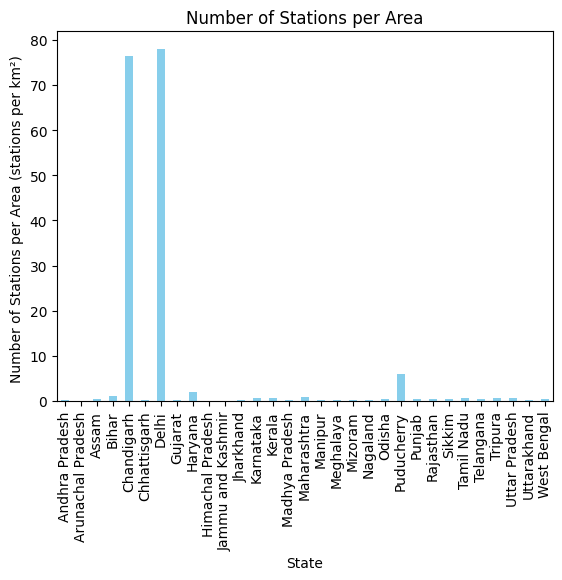

In [38]:
#2
(result.groupby("State")["station"].size() / result.groupby("State")["Area (km2)"].mean()).plot(kind='bar',
                                                                                                color='skyblue', title="Number of Stations per Area", xlabel="State", ylabel="Number of Stations per Area (stations per km²) ")
print("state with the highest density of monitoring stations relative to its area")
print((result.groupby("State")["station"].size()/result.groupby("State")["Area (km2)"].mean()).idxmax(),"\n")

<Axes: xlabel='month'>

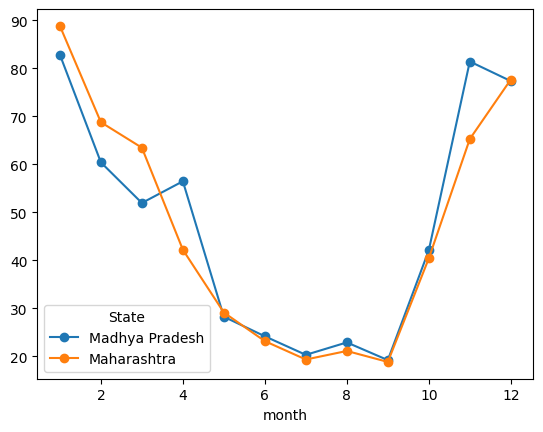

In [50]:
#3
filter_dat = result[result["Timestamp"].dt.year == 2021]
filter_dat = filter_dat[filter_dat["State"].isin(["Madhya Pradesh", "Maharashtra"])]
filter_dat["month"] = filter_dat["Timestamp"].dt.month
filter_dat.groupby(["month", "State"])["PM2.5"].mean().unstack().plot(kind="line", marker="o")


In [53]:
print(filter_dat.groupby("State")["Population"].mean()/filter_dat.groupby("State")["Area (km2)"].mean())


State
Madhya Pradesh    235.608557
Maharashtra       365.192023
dtype: float64


In [55]:
filter_dat.groupby("State")["PM2.5"].mean()

,PM2.5
State,
Madhya Pradesh,47.095952
Maharashtra,46.440044


Generally, higher population density is expected to be associated with higher pollution levels due to increased human activities and emissions.

However Here that is not the case Madhya Pradesh has a lower population density compared to Maharashtra, its average PM2.5 concentration is slightly higher, which can also be impacted by other factors such as industrial activity and prevailing wind conditions.

<h1> Funding Based </h1>

In [60]:
#1
funds.head(5)

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91


In [159]:
funds["Amount released during FY 2021-22"] = pd.to_numeric(funds["Amount released during FY 2021-22"], errors='coerce')
# Replace NaN values with 0 before converting to integers
funds["Amount released during FY 2021-22"] = funds["Amount released during FY 2021-22"].fillna(0).astype(float)
state_sums = funds.groupby("State")["Amount released during FY 2021-22"].sum()
state_pm25 = result.groupby("State")["PM2.5"].mean()
final = pd.concat([state_sums, state_pm25], axis=1 , join = "inner")
print(final)


                  Amount released during FY 2021-22       PM2.5
State                                                          
Andhra Pradesh                                11.48   35.049347
Assam                                          0.00   57.962372
Bihar                                          4.40   76.918759
Chandigarh                                     4.61   56.666803
Chhattisgarh                                   0.00   28.761571
Delhi                                         11.25  104.100918
Gujarat                                        0.00   52.462657
Himachal Pradesh                               0.48   62.516878
Jharkhand                                      0.00   54.281545
Karnataka                                      7.32   28.894840
Madhya Pradesh                                 5.02   45.874375
Maharashtra                                   11.90   43.491415
Meghalaya                                      0.00   24.513390
Nagaland                                

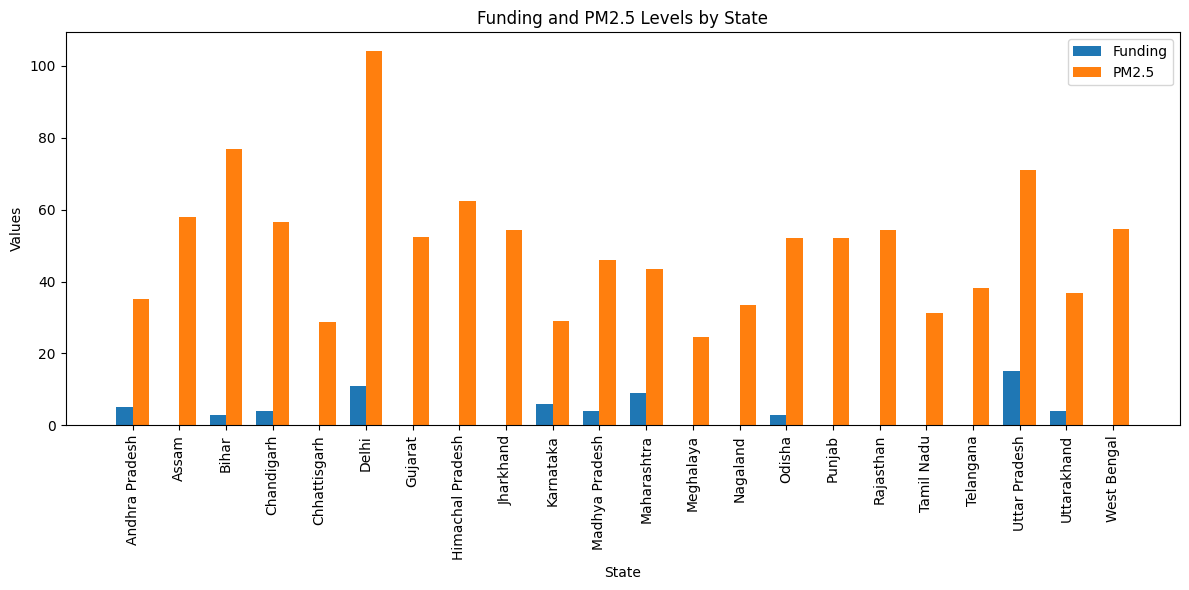

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'final' DataFrame contains state_sums and state_pm25

# Get state names
states = final.index

# Set width of bars
bar_width = 0.35

# Set positions of bars on X axis
x_pos = np.arange(len(states))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

# Plot bars for funding
ax.bar(x_pos, final['Amount released during FY 2021-22'], bar_width, label='Funding')

# Plot bars for PM2.5, shifted slightly to the right
ax.bar(x_pos + bar_width, final['PM2.5'], bar_width, label='PM2.5')

# Set labels, title, and ticks
ax.set_xlabel('State')
ax.set_ylabel('Values')
ax.set_title('Funding and PM2.5 Levels by State')
ax.set_xticks(x_pos + bar_width / 2)  # Center ticks between bars
ax.set_xticklabels(states, rotation=90)  # Rotate state names for readability
ax.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [157]:
state_sums = state_sums >0
final = pd.concat([state_sums, state_pm25], axis=1)
final.groupby("Amount released during FY 2021-22")["PM2.5"].mean()


,PM2.5
Amount released during FY 2021-22,
False,45.368887
True,55.078872


We can see even though states recieved funding their average pollution level is higher than states not getting fund
possible explanation of this might be only the states that contribute to major pollution are recieveing funding which also might not be enough

In [156]:
funds[funds['State'] == 'Assam'].head(10)

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
13,14,Assam,Guwahati,0.12,5,-,5.12,1.45
14,15,Assam,Nagaon,0.06,2,-,2.06,1.45
15,16,Assam,Nalbari,0.06,1,-,1.06,1.45
16,17,Assam,Sibsagar,0.06,2,-,2.06,1.45
17,18,Assam,Silchar,0.06,2,-,2.06,1.45


In [162]:
#2
dic = {2019: 0,2020: 0,2021: 0}
assam_funding21 = funds[funds['State'] == 'Assam'].groupby('State')["Amount released during FY 2021-22"].sum().values[0]

funds["Amount released during FY 2020-21"] = pd.to_numeric(funds["Amount released during FY 2020-21"], errors='coerce')
# Replace NaN values with 0 before converting to integers
funds["Amount released during FY 2020-21"] = funds["Amount released during FY 2020-21"].fillna(0).astype(float)
funds["Amount released during FY 2019-20"] = pd.to_numeric(funds["Amount released during FY 2019-20"], errors='coerce')
# Replace NaN values with 0 before converting to integers
funds["Amount released during FY 2019-20"] = funds["Amount released during FY 2019-20"].fillna(0).astype(float)
assam_funding20 = funds[funds['State'] == 'Assam'].groupby('State')["Amount released during FY 2020-21"].sum().values[0]
assam_funding19 = funds[funds['State'] == 'Assam'].groupby('State')["Amount released during FY 2019-20"].sum().values[0]
dic[2021] = assam_funding21
dic[2020] = assam_funding20
dic[2019] = assam_funding19


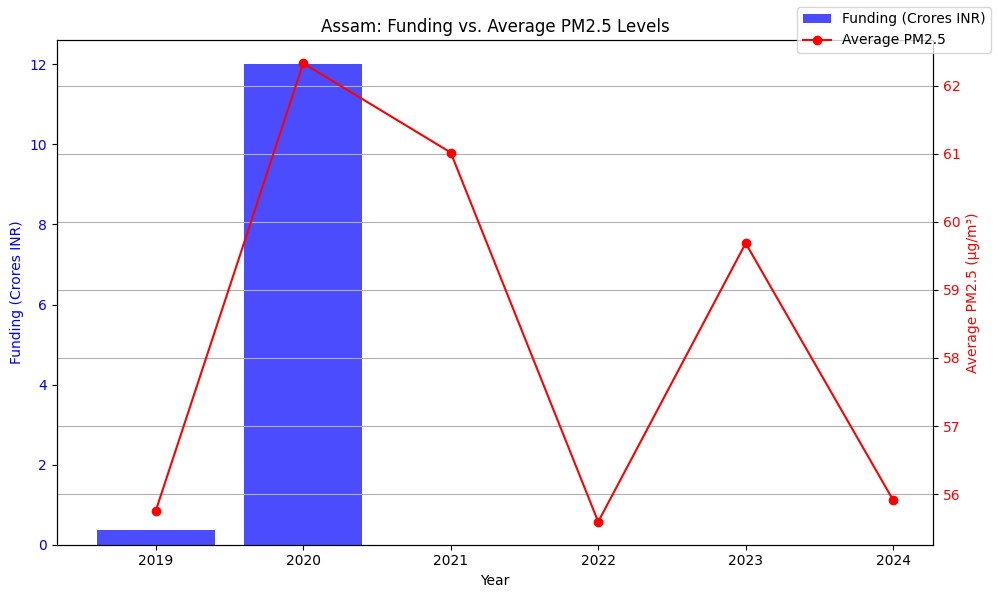

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Assam funding data (provided)
assam_funding = {2019: 0.36, 2020: 12.0, 2021: 0.0}

# Filter data for Assam and extract relevant columns
assam_pm25_data = data[data['state'] == 'Assam'][['Timestamp', 'PM2.5']]

# Convert Timestamp to datetime objects and extract year
assam_pm25_data['Timestamp'] = pd.to_datetime(assam_pm25_data['Timestamp'])
assam_pm25_data['Year'] = assam_pm25_data['Timestamp'].dt.year

# Group by year and calculate average PM2.5 levels
assam_pm25_avg = assam_pm25_data.groupby('Year')['PM2.5'].mean()

# Merge funding and PM2.5 data
merged_data = pd.DataFrame({'Funding': pd.Series(assam_funding), 'PM2.5': assam_pm25_avg})

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot funding data (bar plot)
ax1.bar(merged_data.index, merged_data['Funding'], color='blue', alpha=0.7, label='Funding (Crores INR)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Funding (Crores INR)', color='blue')
ax1.tick_params('y', labelcolor='blue')

# Create a second y-axis for PM2.5 levels (line plot)
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['PM2.5'], color='red', marker='o', label='Average PM2.5')
ax2.set_ylabel('Average PM2.5 (µg/m³)', color='red')
ax2.tick_params('y', labelcolor='red')

# Set plot title and legend
plt.title('Assam: Funding vs. Average PM2.5 Levels')
fig.legend(loc='upper right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Has an increment of the financing led to noticeable improvements in air quality?
we can clearly see no

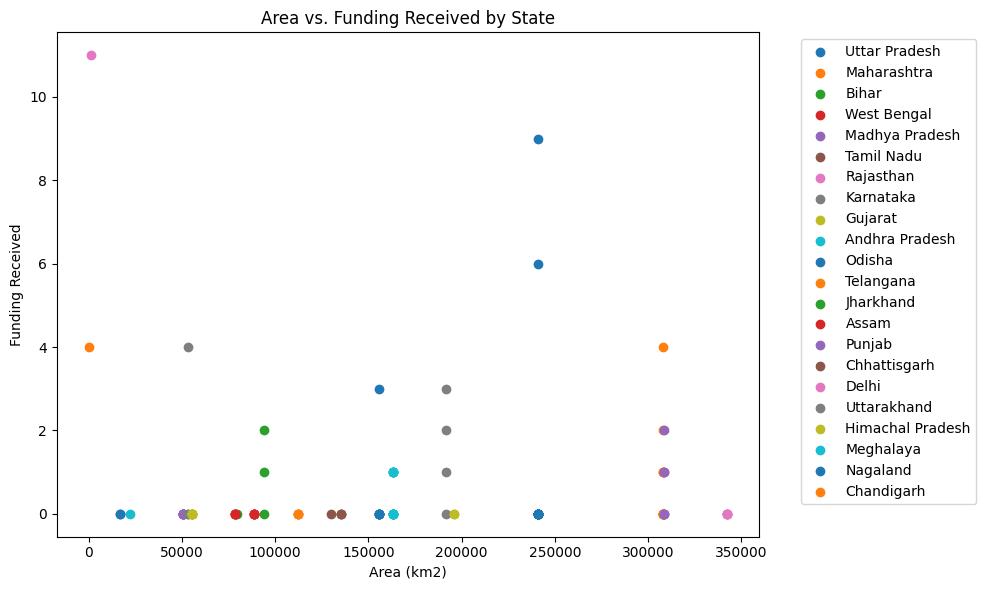

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'state' contains area data and 'funds' contains funding data

# Merge dataframes on 'State' column
merged_data = pd.merge(state, funds, on='State', how='inner')

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with different colors for each state
for state_name in merged_data['State'].unique():
    state_data = merged_data[merged_data['State'] == state_name]
    ax.scatter(state_data['Area (km2)'], state_data['Amount released during FY 2021-22'], label=state_name)

# Set plot labels and title
ax.set_xlabel('Area (km2)')
ax.set_ylabel('Funding Received')
ax.set_title('Area vs. Funding Received by State')

# Place legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

<h1>Miscellaneous Questions</h1>

In [118]:
#1
import pandas as pd

# Assuming 'data' contains the PM2.5 data

# Filter data for 2023
data_2023 = data[data['Timestamp'].str.startswith('2023')]

# Group by city and calculate average PM2.5 levels
city_avg_pm25 = data_2023.groupby('city')['PM2.5'].mean()

# Find the most polluted city
most_polluted_city = city_avg_pm25.idxmax()

# Filter data for the most polluted city
city_data = data_2023[data_2023['city'] == most_polluted_city]

# Calculate the number of days with PM2.5 above the hazardous threshold
hazardous_days = city_data[city_data['PM2.5'] > 300]['Timestamp'].nunique()

# Calculate the total number of days with data
total_days = city_data['Timestamp'].nunique()

# Calculate the percentage of hazardous days
percentage_hazardous = (hazardous_days / total_days) * 100

# Print the result
print(f"Percentage of days with PM2.5 above hazardous threshold in {most_polluted_city} (2023): {percentage_hazardous:.2f}%")

Percentage of days with PM2.5 above hazardous threshold in Darbhanga (2023): 0.82%


<ipython-input-119-cdb9f6b53ca9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Timestamp'] = pd.to_datetime(delhi_data['Timestamp'])


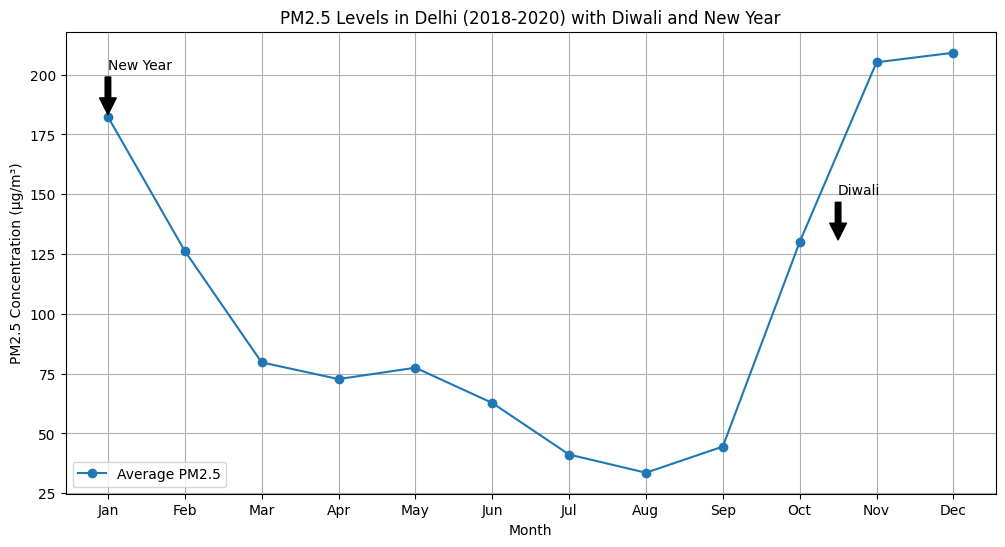

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' contains the PM2.5 data

# Filter data for Delhi and the specified years
delhi_data = data[(data['state'] == 'Delhi') & (data['Timestamp'].str[:4].isin(['2018', '2019', '2020']))]

# Convert 'Timestamp' to datetime objects
delhi_data['Timestamp'] = pd.to_datetime(delhi_data['Timestamp'])

# Group by month and calculate average PM2.5 levels
monthly_avg_pm25 = delhi_data.groupby(delhi_data['Timestamp'].dt.month)['PM2.5'].mean()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25.values, marker='o', label='Average PM2.5')

# Mark Diwali and New Year periods with arrows
plt.annotate('Diwali', xy=(10.5, monthly_avg_pm25[10]), xytext=(10.5, monthly_avg_pm25[10] + 20),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('New Year', xy=(1, monthly_avg_pm25[1]), xytext=(1, monthly_avg_pm25[1] + 20),
             arrowprops=dict(facecolor='black', shrink=0.05))


# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('PM2.5 Levels in Delhi (2018-2020) with Diwali and New Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

By examining the plot and the position of the arrows, you can observe if there are significant pollution spikes during Diwali and New Year compared to other months.
If spikes are observed, it indicates a potential increase in PM2.5 levels during these festivals, possibly due to increased firecracker usage and other celebratory activities.


<ipython-input-120-bcddc61b4569>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funding_2020['Amount released during FY 2020-21'] = pd.to_numeric(funding_2020['Amount released during FY 2020-21'], errors='coerce')
<ipython-input-120-bcddc61b4569>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Timestamp'] = pd.to_datetime(state_data['Timestamp'])


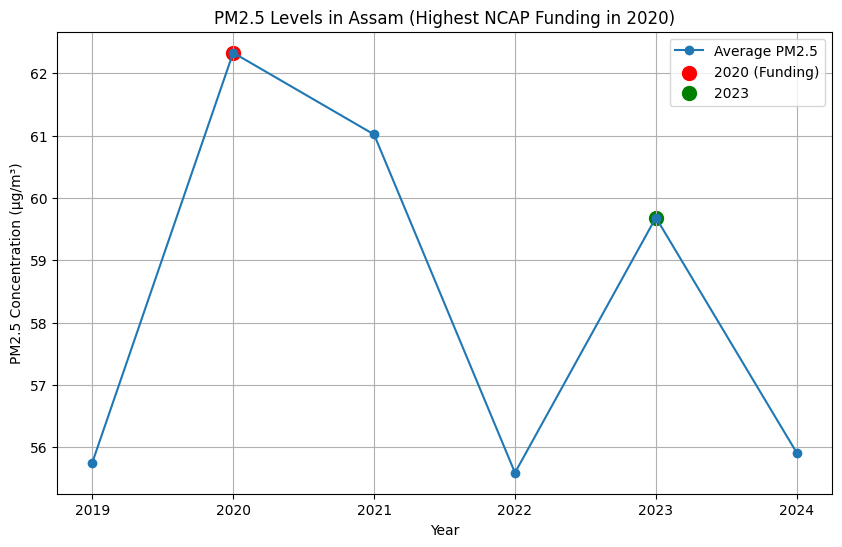

State with highest NCAP funding in 2020: Assam


In [120]:
#3
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' contains PM2.5 data and 'funds' contains NCAP funding data

# Extract funding data for 2020
funding_2020 = funds[['State', 'Amount released during FY 2020-21']]
funding_2020['Amount released during FY 2020-21'] = pd.to_numeric(funding_2020['Amount released during FY 2020-21'], errors='coerce')
funding_2020 = funding_2020.dropna()  # Drop rows with missing funding values
funding_2020['Amount released during FY 2020-21'] = funding_2020['Amount released during FY 2020-21'].astype(int)

# Find the state with the highest funding in 2020
highest_funded_state = funding_2020.loc[funding_2020['Amount released during FY 2020-21'].idxmax(), 'State']

# Filter PM2.5 data for the highest funded state
state_data = data[data['state'] == highest_funded_state]

# Convert 'Timestamp' to datetime objects
state_data['Timestamp'] = pd.to_datetime(state_data['Timestamp'])

# Group by year and calculate average PM2.5 levels
yearly_avg_pm25 = state_data.groupby(state_data['Timestamp'].dt.year)['PM2.5'].mean()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25.index, yearly_avg_pm25.values, marker='o', label='Average PM2.5')

# Highlight 2020 and 2023 data points
plt.scatter(2020, yearly_avg_pm25.get(2020, float('nan')), color='red', marker='o', s=100, label='2020 (Funding)')
plt.scatter(2023, yearly_avg_pm25.get(2023, float('nan')), color='green', marker='o', s=100, label='2023')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title(f'PM2.5 Levels in {highest_funded_state} (Highest NCAP Funding in 2020)')
plt.legend()
plt.grid(True)
plt.show()

# Print the highest funded state
print(f"State with highest NCAP funding in 2020: {highest_funded_state}")


Sensor Distribution by State:
Maharashtra: 97 stations
Uttar Pradesh: 57 stations
Rajasthan: 46 stations
Karnataka: 42 stations
Delhi: 40 stations
Bihar: 36 stations
Tamil Nadu: 36 stations
Haryana: 32 stations
Madhya Pradesh: 29 stations
West Bengal: 22 stations
Odisha: 19 stations
Gujarat: 17 stations
Telangana: 14 stations
Chhattisgarh: 14 stations
Andhra Pradesh: 13 stations
Assam: 9 stations
Kerala: 9 stations
Punjab: 8 stations
Jharkhand: 4 stations
Chandigarh: 3 stations
Uttarakhand: 3 stations
Tripura: 2 stations
Meghalaya: 2 stations
Manipur: 2 stations
Puducherry: 1 stations
Himachal Pradesh: 1 stations
Arunachal Pradesh: 1 stations
Nagaland: 1 stations
Jammu and Kashmir: 1 stations
Mizoram: 1 stations
Sikkim: 1 stations


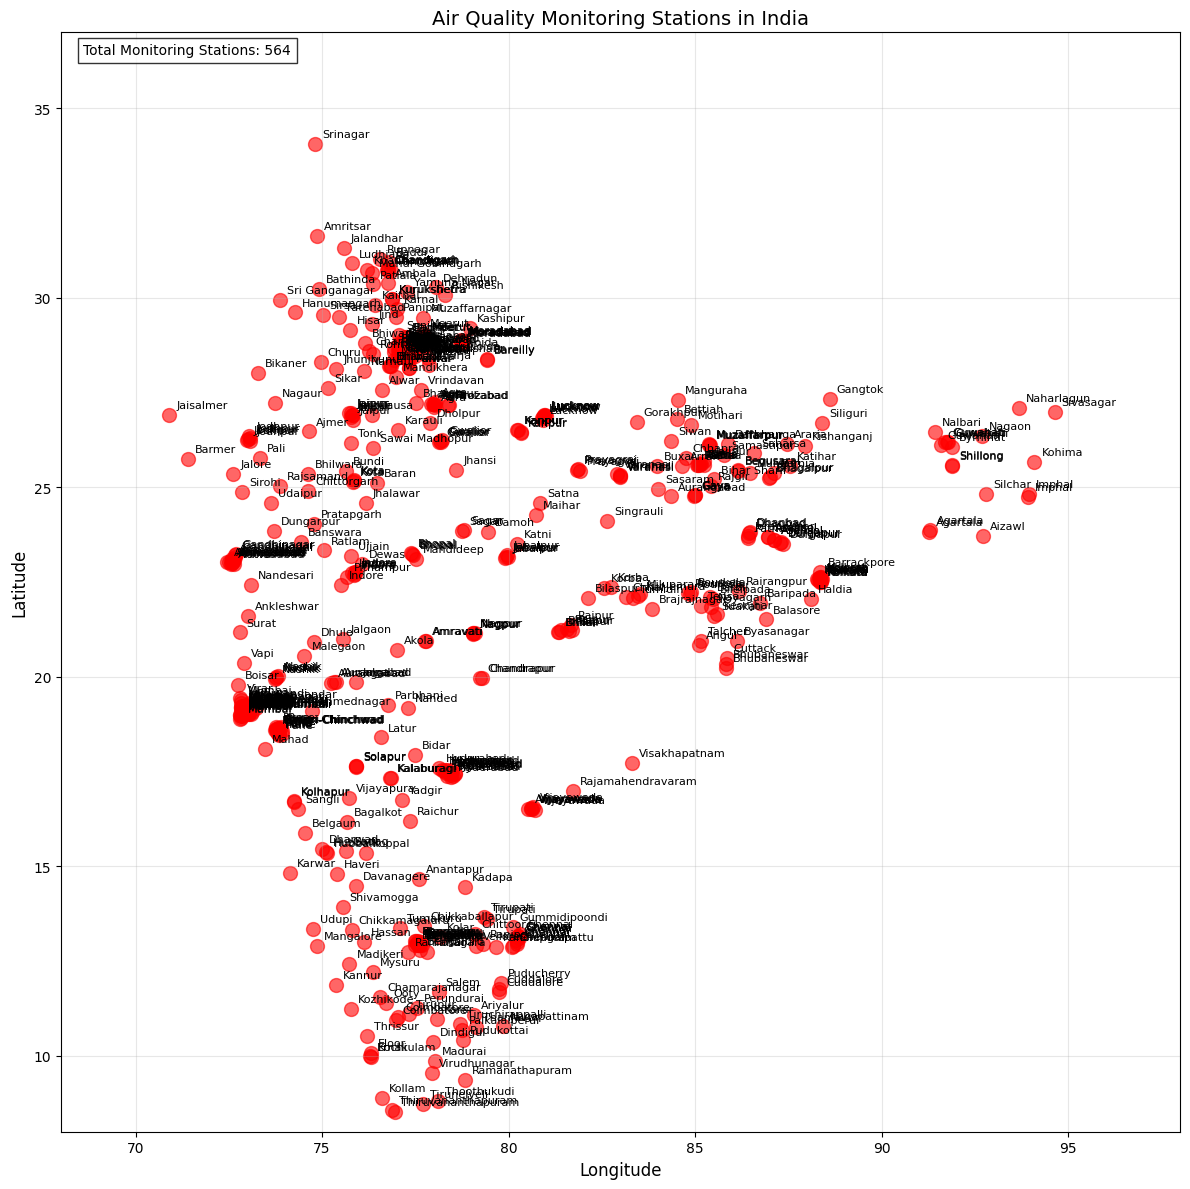

In [124]:
# 4 Draw the map of India and plot the sensor locations on the map.

plt.figure(figsize=(12, 12))

# Get unique sensor locations to avoid duplicates
unique_locations = data[['latitude', 'longitude', 'city', 'state']].drop_duplicates()

plt.scatter(unique_locations['longitude'],
           unique_locations['latitude'],
           c='red',
           alpha=0.6,
           s=100)

# Add labels for major cities
for idx, row in unique_locations.iterrows():
    plt.annotate(row['city'],
                (row['longitude'], row['latitude']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8)

plt.title('Air Quality Monitoring Stations in India', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Set map bounds to focus on India
plt.xlim(68, 98)
plt.ylim(8, 37)
plt.grid(True, alpha=0.3)

# Add text showing total number of stations
plt.text(0.02, 0.98,
         f'Total Monitoring Stations: {len(unique_locations)}',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Print statistics
print("\nSensor Distribution by State:")
state_counts = unique_locations['state'].value_counts()
for state, count in state_counts.items():
    print(f"{state}: {count} stations")

plt.tight_layout()
plt.show()

<h1> Tell us Something New </h1>


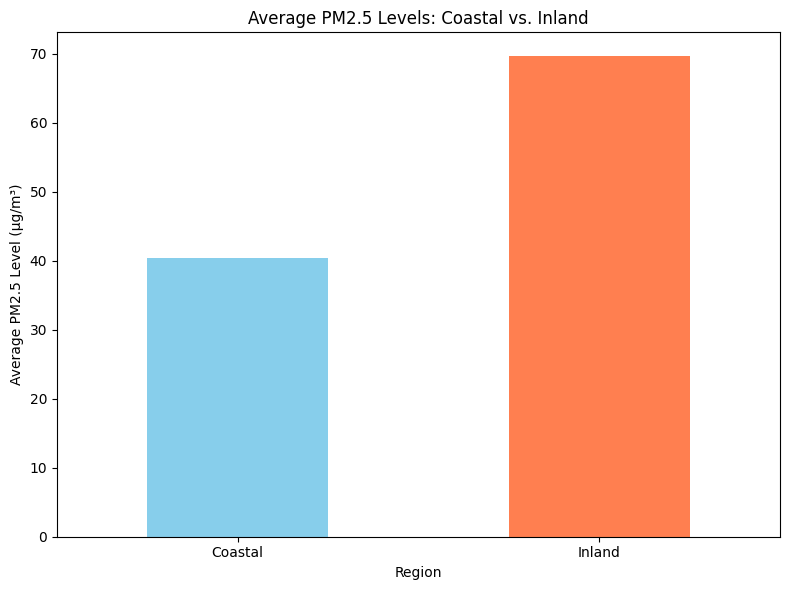


T-test Results:
  - T-statistic: -217.93
  - P-value: 0.000
  - There is a statistically significant difference in PM2.5 levels between coastal and inland regions.


In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' contains the PM2.5 data and 'state' has state information

# Define coastal states (You can adjust this list as needed)
coastal_states = ['Gujarat', 'Maharashtra', 'Goa', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Andhra Pradesh', 'Odisha', 'West Bengal']

# Add a 'Region' column to the data DataFrame
data['Region'] = data['state'].apply(lambda state: 'Coastal' if state in coastal_states else 'Inland')

# Group data by region and calculate average PM2.5 levels
regional_avg_pm25 = data.groupby('Region')['PM2.5'].mean()

# Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 6))
regional_avg_pm25.plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Average PM2.5 Levels: Coastal vs. Inland')
plt.xlabel('Region')
plt.ylabel('Average PM2.5 Level (µg/m³)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

# Perform a t-test to check for statistical significance
from scipy import stats

coastal_data = data[data['Region'] == 'Coastal']['PM2.5']
inland_data = data[data['Region'] == 'Inland']['PM2.5']

t_statistic, p_value = stats.ttest_ind(coastal_data, inland_data, nan_policy='omit')

print(f"\nT-test Results:")
print(f"  - T-statistic: {t_statistic:.2f}")
print(f"  - P-value: {p_value:.3f}")

if p_value < 0.05:
    print("  - There is a statistically significant difference in PM2.5 levels between coastal and inland regions.")
else:
    print("  - There is no statistically significant difference in PM2.5 levels between coastal and inland regions.")

Reasoning:

Balanced Factors: The influencing factors might be balanced, with coastal areas experiencing both pollution-reducing effects (sea breeze) and pollution-increasing effects (industrial activity).
Data Limitations: The dataset might not have sufficient coverage or representativeness of both coastal and inland areas, leading to inconclusive results.
Regional Variability: Pollution levels can vary significantly within coastal and inland regions due to local factors like topography, weather patterns, and specific pollution sources. The overall average might not capture these regional variations.
